<IPython.core.display.Javascript object>


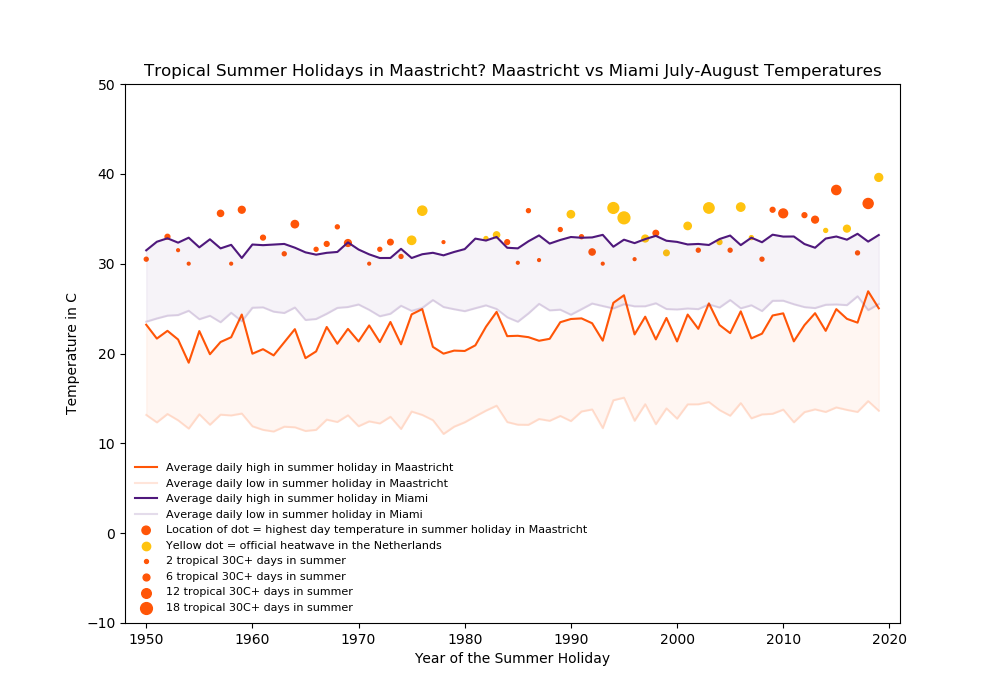

In [291]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import seaborn as sns

def play():
    
    # clean Maastricht data
    # data source: NOAA, station Maastricht NL, www.ncdc.noaa.gov 
    
    dfb = pd.read_csv('maastricht-daily.csv')
    dfb = dfb[dfb["NAME"] == 'MAASTRICHT, NL']
    dfb = dfb.drop(['STATION','SNWD','TAVG'], axis=1)
    dfb['DATE']= pd.to_datetime(dfb.DATE)
    dfb= dfb[(dfb['DATE'].dt.month == 7) | (dfb['DATE'].dt.month == 8)]
    dfb['YEAR'] = dfb['DATE'].dt.year
    dfb['SUMPRCP'] = ""
    dfb['EMAX'] = dfb.groupby(['YEAR'])['TMAX'].transform(max)
    dfb['TROPDAY'] = np.where(dfb['TMAX']> 29.9, 1, np.nan)
    dfb['RAINDAY'] = np.where(dfb['PRCP']> 0, 1, np.nan)
    dfb2 = dfb.groupby('YEAR').agg({
        'RAINDAY' : [("RAINDAYS", 'sum')], 
        'TROPDAY' : [("TROPDAYS", 'sum')],
        'PRCP' : [("SUMPRCP", 'sum')],
        'EMAX' : [("TMAX", 'max')],
        'TMAX' : [("TMAX", 'mean')],
        'TMIN' : [("TMIN", 'mean')],
    })
    
    dfb2.columns = dfb2.columns.droplevel(1)
    dfb2['CITY'] = 'Maastricht'
    
    # clean Miami data
    # data source: NOAA, station Miami International Airport, www.ncdc.noaa.gov 
    
    dfm = pd.read_csv('miami.csv')
    dfm = dfm[dfm["NAME"] == 'MIAMI INTERNATIONAL AIRPORT, FL US']
    dfm = dfm.drop(['STATION','DAPR','MDPR','SNOW','SNWD','TAVG','TOBS'], axis=1)
    dfm['DATE']= pd.to_datetime(dfm.DATE)
    dfm= dfm[(dfm['DATE'].dt.month == 7) | (dfm['DATE'].dt.month == 8)]
    dfm['YEAR'] = dfm['DATE'].dt.year
    dfm['SUMPRCP'] = ""
    dfm['EMAX'] = dfm.groupby(['YEAR'])['TMAX'].transform(max)
    dfm['TROPDAY'] = np.where(dfm['TMAX']> 29.9, 1, np.nan)
    dfm['RAINDAY'] = np.where(dfm['PRCP']> 0, 1, np.nan)
    
    dfm2 = dfm.groupby('YEAR').agg({
        'RAINDAY' : [("RAINDAYS", 'sum')], 
        'TROPDAY' : [("TROPDAYS", 'sum')],
        'PRCP' : [("SUMPRCP", 'sum')],
        'EMAX' : [("TMAX", 'max')],
        'TMAX' : [("TMAX", 'mean')],
        'TMIN' : [("TMIN", 'mean')],
    })
    
    dfm2.columns = dfm2.columns.droplevel(1)
    dfm2['CITY'] = 'Miami'
    dfm2.reset_index(inplace=True)
    
    # clean heatwave data
    # data source: KNMI. https://www.knmi.nl/nederland-nu/klimatologie/lijsten/hittegolven
    
    dfhw = pd.read_excel('hittegolven.xlsx')
    
    dfhw['Hoog']= pd.to_datetime(dfhw.Hoog)
    dfhw= dfhw[(dfhw['Hoog'].dt.month == 7) | (dfhw['Hoog'].dt.month == 8)]
    dfhw['YEAR'] = dfhw['Hoog'].dt.year
    dfhw = dfhw.drop(['Van','tot en met', 'Aantal tropische dagen', 'Hoogste temp','Hoog'], axis=1)
    
    dfhw = dfhw[['YEAR','Duur']]

    # create color frame
    
    df = dfb2.merge(dfhw, on="YEAR",how="outer") 
    df = df[['YEAR', 'TROPDAY','Duur']]
    df['Color'] = np.where(df['Duur'] >0 , '#FFC30F', "#FF5507")

    # graphs
    
    year = dfb2.index.values
    rainday = dfb2["RAINDAY"].values
    tropday = dfb2["TROPDAY"].values
    prcp = dfb2["PRCP"].values
    emax = dfb2["EMAX"].values
    tmax = dfb2["TMAX"].values
    tmin = dfb2["TMIN"].values
    miamitmax = dfm2["TMAX"].values
    miamin = dfm2['TMIN'].values
    xheatw = dfhw["YEAR"].values
    heatw = dfhw["Duur"].values
    color = df["Color"].values
 
    plt.figure(figsize=(10,7))
    plt.plot(year, tmax, c="#FF5507", label= "Average daily high in summer holiday in Maastricht")
    plt.plot(year, tmin, color='#FF5507',alpha=0.15, label= "Average daily low in summer holiday in Maastricht")
    plt.plot(year, miamitmax, c="#4F187C", label= "Average daily high in summer holiday in Miami")
    plt.plot(year, miamin, c="#4F187C", alpha=0.15, label= "Average daily low in summer holiday in Miami")
    plt.scatter(year, emax, c=color, s=tropday*4, label= "Location of dot = highest day temperature in summer holiday in Maastricht")
    plt.scatter([], [], c="#FFC30F", s=tropday*4, label="Yellow dot = official heatwave in the Netherlands" )
    for tropday in [2, 6, 12, 18]:
        plt.scatter([], [], c='#FF5507',  s=tropday*4,
                label=str(tropday) + ' tropical 30C+ days in summer' )
   
    plt.ylim(-10, 50)
    plt.xlim(1948, 2021)
    plt.xlabel('Year of the Summer Holiday')
    plt.ylabel('Temperature in C')
    plt.title('Tropical Summer Holidays in Maastricht? Maastricht vs Miami July-August Temperatures',fontsize=12)

    plt.legend(scatterpoints=1, loc=3, frameon=False, fontsize=8)
    plt.fill_between(year, tmax, tmin, color='#FF5507',alpha=0.05)
    plt.fill_between(year, miamitmax, miamin, color='#4F187C',alpha=0.05)
    
    return plt.show()

play()
